# Plot 2D histograms
- $m(D^*3\pi)$ vs the flight distance of the $3\pi$ system
- $m(3\pi)$ vs the flight distance of the $3\pi$ system

In [3]:
name_data = 'common_B0TODstDs_Dst_constr'

In [11]:
low = 5150.
high = 5450.

In [7]:
import matplotlib.pyplot as plt
from bd2dst3pi.locations import loc


import numpy as np
import pandas as pd

from bd2dst3pi.definitions import years, magnets
import os.path as op

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, add_flight_distance_tau, add_constr_Dst
import plot.histogram as h
from plot.tool import save_file, save_file, set_text_LHCb

## Load variables

Needed variables:
- B0_M and BDT
- B0_ENDVERTEX_X, B0_ENDVERTEX_Y, B0_ENDVERTEX_Z
- tau_ENDVERTEX_X, tau_ENDVERTEX_Y, tau_ENDVERTEX_Z
- tau_ENDVERTEX_XERR, tau_ENDVERTEX_YERR, tau_ENDVERTEX_ZERR

In [6]:
variables = []

for particle in 'B0', 'Dst', 'D0','tau':
    variables.append(f"{particle}_M")

for particle in 'B0', 'tau':
    for axis in 'X','Y','Z':
        variables.append(f'{particle}_ENDVERTEX_{axis}')
        variables.append(f'{particle}_ENDVERTEX_{axis}ERR')

variables.append('BDT')

In [8]:
df = load_data(years,magnets,type_data = 'common',vars = variables, cut_DeltaM=True, cut_PIDK=None)
df = add_constr_Dst(df)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


## Plots

### $m(D^*3\pi|m(D^*)=m(D^*)_{PDG})$ vs fight distance of the $3\pi$ system

In [9]:
df = add_flight_distance_tau(df)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODstDs_Dst_constr/Dst_constr_B0_M_vs_tau_flight


(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Flight distance($3\\pi$) [mm]'>)

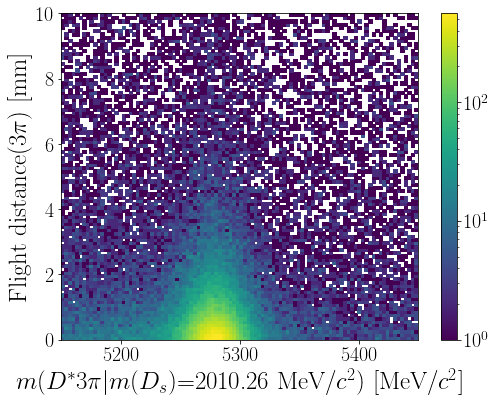

In [12]:
h.plot_hist2d_particle(df,['Dst_constr_B0_M','tau_flight'],
            low=[low,0],high=[high,10], log_scale = True,
            name_folder = name_data)

### Flight distance

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_flight
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_flight_Z


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='flight\\_Z($3\\pi$)', ylabel='Candidates / (2)'>)

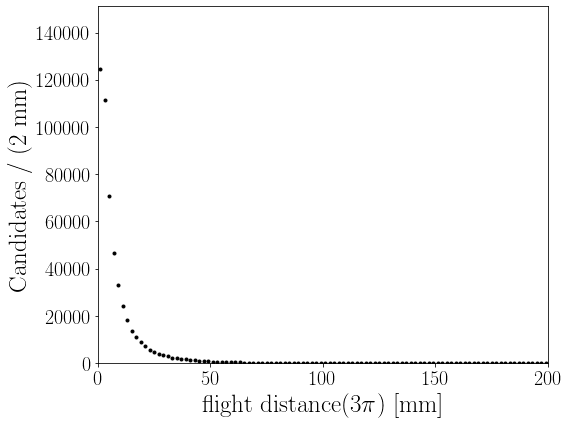

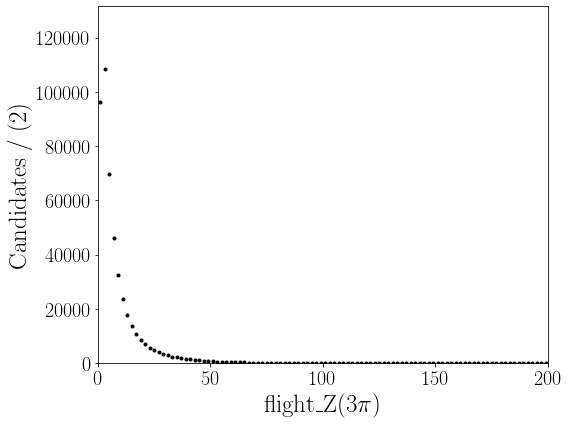

In [11]:
h.plot_hist_particle({name_data:df},'tau_flight', n_bins = 100, low = 0, high = 200,
            name_file = 'tau_flight',name_folder = name_BDT, colors='black')
h.plot_hist_particle({name_data:df},'tau_flight_Z', n_bins = 100, low = 0, high = 200,
            name_file = 'tau_flight_Z',name_folder = name_BDT, colors='black')

### $m(3\pi)$ spectrum

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_M


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (3e+01 MeV/$c^2$)'>)

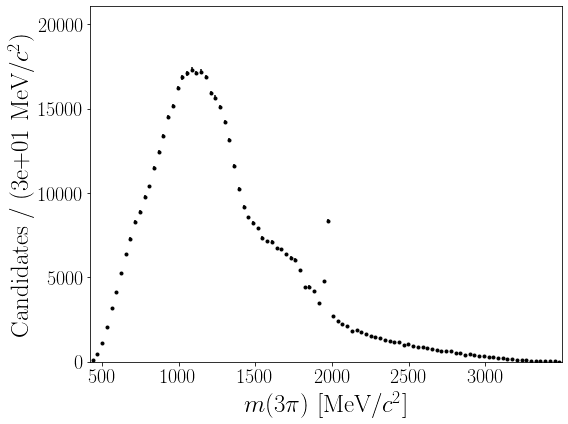

In [12]:
h.plot_hist_particle({name_data:df},'tau_M', n_bins = 100,colors='black',
            name_file = 'tau_M',name_folder = name_BDT)

The peak around $m(D_s)=1,968$ MeV/$c^2$ corresponds to the $D_s^+\to3\pi$ decay

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_Ds


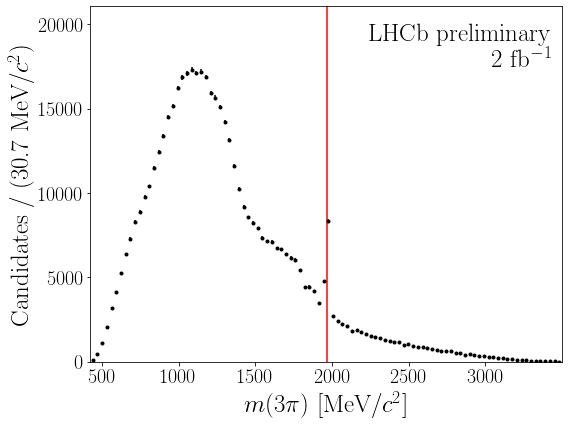

In [13]:
fig, ax = h.plot_hist_particle({name_data:df},'tau_M', n_bins = 100,colors='black',
            name_file = 'tau_M', save_fig=False, pos_text_LHC='right')
ax.axvline(x=1968., color='r')
save_file(fig, "tau_M_Ds")

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_common_cutDeltaM/tau_M_vs_tau_flight
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_common_cutDeltaM/tau_M_vs_tau_flight


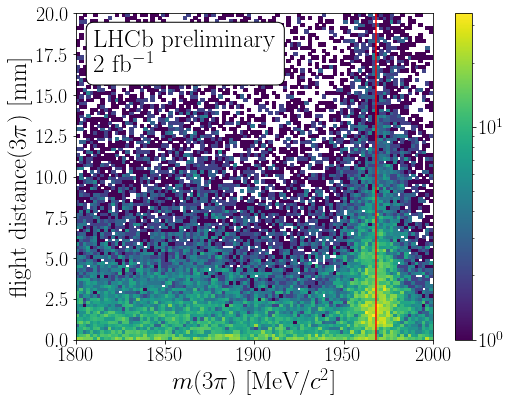

In [13]:
fig, ax = h.plot_hist2d_particle(df,['tau_M','tau_flight'],
            low=[1800,0],high=[2000,20], log_scale=True,
            name_folder = name_data)
ax.axvline(x=1968., color="r")
t = set_text_LHCb(ax, pos=[0.05, 0.95, 'left'])
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='round'))

save_file(fig, "tau_M_vs_tau_flight",name_data)